arc [0.6215722027413221, 1.3442283336633962, 2.791216404845428, 1.0819406739684403, 0.5337313532858059, 0.42632812161416433, 0.5470630338660205, 0.7082495940258025, 0.8602030261542091, 0.9965453939796963, 1.1184205689710145, 1.2280037061228994, 1.3272972848366111, 1.4179489158475547, 1.5012801826304651, 1.5783499231794407, 1.6500123970077238, 1.716963503281135, 1.7797759927550967]
out [100.         100.66079369 100.96634519 101.11349644 101.49312076
 102.26266706 103.22608224 103.97687505 104.55679912 105.03428057
 105.44643539 105.81367737 106.14814785 106.45759698 106.74726255
 107.02084971 107.28107781 107.53000381 107.76922321 108.        ]


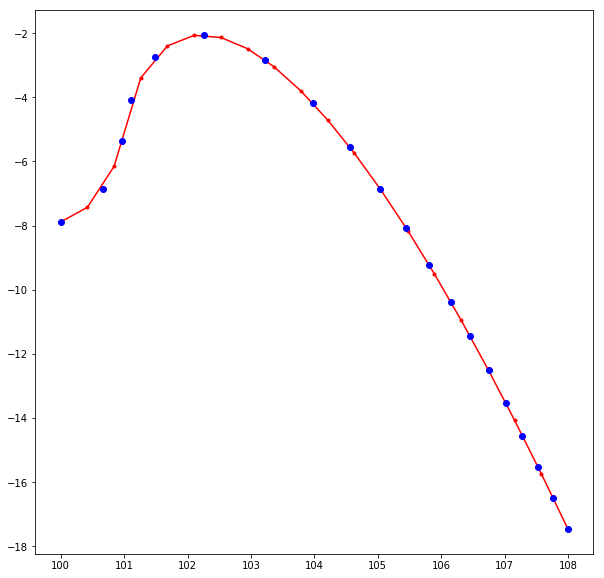

In [162]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
import random as rn

#====DISTANCE====
def distance(xi,yi,xii,yii):
    sq1 = (xi-xii)**2
    sq2 = (yi-yii)**2
    return math.sqrt(sq1 + sq2)

def linmap(vin,c,d):
    a = np.amin(vin);
    b = np.amax(vin);
    return ((c+d) + (d-c)*((2*vin - (a+b))/(b-a)))/2

def disttup(i,ii):
    sq1 = (i[0]-ii[0])**2
    sq2 = (i[1]-ii[1])**2
    return math.sqrt(sq1 + sq2)
#================

#========================EVENLY SPACE BY ARCLENGTH========================
def evenArcX( func, xmin, xmax, r) :
    
    # func      - function of your curve, must output a "y" for given "x"
    # xmin,xmax - the range of the function you want to operate on
    # r         - number of points you want to evenly distrubute
    
    # return    - an array of x values such that when passed to "func" the
    #             resulting points will be approx evenly spaced according
    #             to their arclength
    
    outx = [];

    res = r

    badx = np.linspace(xmin,xmax, res)
    bady = func(badx)

    arcdist = []

    for i in range(1, len(badx)):
        arcdist.append( distance( badx[i-1], bady[i-1], badx[i], bady[i]) )
        
    #print(len(arcdist))
    print("arc", arcdist)

    indist = [1/x for x in arcdist]
    indist.insert(0,0)
    subx = np.cumsum(indist)
    #subx = [x + xmin for x in subx]
    outx = linmap(subx,xmin,xmax)
    #outx = np.asarray( [(x) * (xmax/subx[-1]) for x in subx] )
    
    print("out", outx)
    
    return outx
#=========================================================================

def evenArcRec( func, xlin, test = 3, testac = 0.01 ) :
    
    # func      - function of your curve, must output a "y" for given "x"
    # xmin,xmax - the range of the function you want to operate on
    # r         - number of points you want to evenly distrubute
    
    # return    - an array of x values such that when passed to "func" the
    #             resulting points will be approx evenly spaced according
    #             to their arclength
    
    outx = [];

    res = len(xlin)

    badx = xlin
    bady = func(badx)
    
    #get three test points
    testind = []
    testlist = []
    for i in range(test):
        spot = rn.randint(1, len(badx) - 2)
        testind.append( spot )
        testlist.append( (badx[spot],bady[spot]) )
    #print(testind)
    #print(testlist)

    arcdist = []

    for i in range(1, len(badx)):
        #print("i:", i)
        #print("x:", round( badx[i-1], 2 ), "-" , round( badx[i], 2))
        arcdist.append( distance( badx[i-1], bady[i-1], badx[i], bady[i]) )

    #print(len(arcdist))
    #print(arcdist)

    #for i in range(0, len(arcdist) - 1):
    #    newx.extend( np.linspace(badx[i], badx[i+1], math.floor(arcdist[i])) )

    indist = [1/x for x in arcdist]
    indist.insert(0,0)
    subx = np.cumsum(indist)
    outx = np.asarray( [x * (badx[-1]/subx[-1]) for x in subx] )
    
    newtestlist = []
    for i in testind:
        newtestlist.append( (outx[i],func(outx[i])) )
        
    #print(newtestlist)
    ##flag = 0
    ##for i in range(len(testlist)):
    ##    dist = distance(testlist[i][0], testlist[i][1], newtestlist[i][0], newtestlist[i][1])
    ##    print("dif ", i, ": ", dist )
    ##    if dist <= testac:
    ##        flag = 1
    
    #print(outx)
    ##if test == 0:
    ##    return outx
    ##else:
    ##    if flag == 1
    ##        return outx
    
    print(test)
    
    if test == 0:
        return outx
    else:
        return evenArcRec( func, outx, test - 1 )
#=========================================================================
    
#====USING THE FUNCTION====
#def test_func( x ) : return 0.08* ( x - 3.5 )**3 + 4
def test_func( x ) : return -1 * (0.3 * (x - 101) * 4 * (np.log((np.abs(0.3 * (x- 101))**2) )) + 5)

newx = evenArcX(test_func, 100, 108, 20)
#newx = evenArcRec(test_func, np.linspace(0,8, 20), 0)
newy = []
for x in newx: newy.append(test_func(x))
#========================== 


linx = np.linspace(100, 108, 20)
liny = test_func(linx)    

plt.figure(figsize = (10,10))
plt.plot(linx,liny, 'r.-')
plt.plot(newx, newy, 'bo')